In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
data = pd.read_csv('CpuLogData.csv')
data.head(1)

,DateTime,Cpu Count,Cpu Working Time,Cpu idle Time,cpu_percent,Usage Cpu Count,number of software interrupts since boot,number of system calls since boot,number of interrupts since boot,cpu avg load over 1 min,...,number of bytes sent,number of bytes received,number of packets sent,number of packets recived,total number of errors while receiving,total number of errors while sending,total number of incoming packets which were dropped,total number of outgoing packets which were dropped,boot_time,user_name
0,2019-05-14 20:00:51,4,3733.17,120971.88,31.8,4,20838767,0,200273168,0.14,...,90269129,140071937,239706,432121,0,1,3,0,8:53:33.433245,admin293


In [14]:
data['Dates'] = pd.to_datetime(data['DateTime']).dt.date
data['Time'] = pd.to_datetime(data['DateTime']).dt.time

- User Name --> Usename is not related, because user name won't decide the performance.

In [15]:
data.drop(columns=['DateTime', 'user_name', 'Time', 'Dates'], inplace=True)

In [16]:
len(data.columns)

39

In [17]:
data.dtypes

Cpu Count                                                int64
Cpu Working Time                                       float64
Cpu idle Time                                          float64
cpu_percent                                            float64
Usage Cpu Count                                          int64
number of software interrupts since boot                 int64
number of system calls since boot                        int64
number of interrupts since boot                          int64
cpu avg load over 1 min                                float64
cpu avg load over 5 min                                float64
cpu avg load over 15 min                               float64
system_total_memory                                      int64
system_used_memory                                       int64
system_free_memory                                       int64
system_active_memory                                     int64
system_inactive_memory                                 

In [18]:
val_list = []
for i in data['boot_time']:
    value = str(i).split(',')
    if len(value) > 1:        
        value = value[1].split(':')
        value = float(value[0] + '.' + value[1])
        val_list.append(value)
    else:
        value = value[0].split(':')
        value = float(value[0] + '.' + value[1])
        val_list.append(value)


In [19]:
data['Boot_Time'] = val_list

In [20]:
data.drop(columns='boot_time', inplace=True)

In [21]:
# data['Boot_Time']

In [22]:
data.columns

Index(['Cpu Count', 'Cpu Working Time', 'Cpu idle Time', 'cpu_percent',
       'Usage Cpu Count ', 'number of software interrupts since boot',
       'number of system calls since boot', 'number of interrupts since boot',
       'cpu avg load over 1 min', 'cpu avg load over 5 min',
       'cpu avg load over 15 min', 'system_total_memory', 'system_used_memory',
       'system_free_memory', 'system_active_memory', 'system_inactive_memory',
       'system_buffers_memory', 'system_cached_memory', 'system_shared_memory',
       'system_avalible_memory', 'disk_total_memory', 'disk_used_memory',
       'disk_free_memory', 'disk_read_count', 'disk_write_count',
       'disk_read_bytes', 'disk_write_bytes', 'time spent reading from disk',
       'time spent writing to disk', 'time spent doing actual I/Os',
       'number of bytes sent', 'number of bytes received',
       'number of packets sent', 'number of packets recived',
       'total number of errors while receiving',
       'total number 

In [23]:
data.dtypes

Cpu Count                                                int64
Cpu Working Time                                       float64
Cpu idle Time                                          float64
cpu_percent                                            float64
Usage Cpu Count                                          int64
number of software interrupts since boot                 int64
number of system calls since boot                        int64
number of interrupts since boot                          int64
cpu avg load over 1 min                                float64
cpu avg load over 5 min                                float64
cpu avg load over 15 min                               float64
system_total_memory                                      int64
system_used_memory                                       int64
system_free_memory                                       int64
system_active_memory                                     int64
system_inactive_memory                                 

In [39]:
data.to_csv('Pre_Pro_v_0.csv')

## K Means

In [93]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
kmeans_labels = kmeans.labels_

In [25]:
print ((pd.DataFrame(kmeans_labels) != 0).values.sum())

105


In [94]:
data['Label'] = kmeans_labels

In [48]:
pd.Series(kmeans_labels).unique()

array([0, 1])

In [95]:
data.head(1)

,Cpu Count,Cpu Working Time,Cpu idle Time,cpu_percent,Usage Cpu Count,number of software interrupts since boot,number of system calls since boot,number of interrupts since boot,cpu avg load over 1 min,cpu avg load over 5 min,...,number of bytes received,number of packets sent,number of packets recived,total number of errors while receiving,total number of errors while sending,total number of incoming packets which were dropped,total number of outgoing packets which were dropped,Boot_Time,kmeans,Label
0,4,3733.17,120971.88,31.8,4,20838767,0,200273168,0.14,0.33,...,140071937,239706,432121,0,1,3,0,8.53,0,0


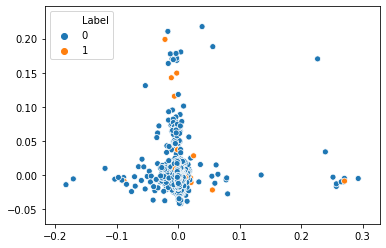

In [116]:
# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X = kpca.fit_transform(data)

sb.scatterplot(x=X[: ,0]
               ,y=X[:, 1]
               ,hue='Label'
               ,data=data)

In [115]:
# import random
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# for column in data.columns:
#     x = data[column]
#     y = kmeans_labels
#     ax.scatter(x, y, alpha=0.8)
# plt.show()

## Hierarchical 

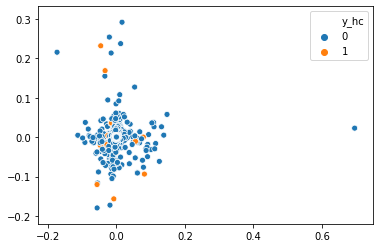

In [119]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)

data["y_hc"] = y_hc
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X = kpca.fit_transform(data)

sb.scatterplot(x=X[: ,0]
               ,y=X[:, 1]
               ,hue='y_hc'
               ,data=data)

In [131]:
# cor = data.corr() #Calculate the correlation of the above variables
# sb.heatmap(cor, square = True) #Plot the correlation as heat map

In [123]:
zero = [i for i in range(len(data)) if data["Label"][i]== 0]

In [130]:
data.head(10)

,Cpu Count,Cpu Working Time,Cpu idle Time,cpu_percent,Usage Cpu Count,number of software interrupts since boot,number of system calls since boot,number of interrupts since boot,cpu avg load over 1 min,cpu avg load over 5 min,...,number of packets recived,total number of errors while receiving,total number of errors while sending,total number of incoming packets which were dropped,total number of outgoing packets which were dropped,Boot_Time,kmeans,Label,MeanShift_labels,y_hc
0,4,3733.17,120971.88,31.8,4,20838767,0,200273168,0.14,0.33,...,432121,0,1,3,0,8.53,0,0,106,0
1,4,3767.15,121920.71,33.3,4,21030713,0,202313416,0.80,0.39,...,433093,0,1,3,0,8.57,0,0,102,0
2,4,3769.52,121938.45,23.8,4,21038802,0,202404974,0.73,0.39,...,433117,0,1,3,0,8.57,0,0,101,0
3,4,3773.42,121984.77,25.0,4,21054241,0,202500215,0.69,0.39,...,433158,0,1,3,0,8.58,0,0,100,0
4,4,3778.91,122102.01,25.0,4,21078850,0,202692540,0.47,0.37,...,433242,0,1,3,0,8.58,0,0,99,0
5,4,3790.60,122355.45,16.0,4,21142313,0,203447060,0.45,0.38,...,433431,0,1,3,0,8.59,0,0,98,0
6,4,3796.35,122583.72,33.3,4,21184738,0,203912994,0.42,0.40,...,433607,0,1,3,0,9.00,0,0,97,0
7,4,3811.23,122798.05,46.9,4,21250414,0,204963858,0.50,0.42,...,433800,0,1,3,0,9.01,0,0,96,0
8,4,3833.33,122999.10,60.6,4,21327446,0,206211025,0.35,0.39,...,434095,0,1,3,0,9.02,0,0,95,0
9,4,87.23,2664.98,25.0,4,473172,0,414381,0.75,0.61,...,31615,0,0,0,0,0.13,1,1,2195,1


- Performance in all the features is low for 9th and 10th, so we can say that 
- 1 --> Inactive
- 0 --> Active